In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("./data/SpotifyFeatures.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [4]:
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [7]:
data.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [6]:
data.dropna(subset=["track_name"], inplace=True)

In [8]:
# Data Type analysis and conversion
# Examine the data types of the columns
data.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

#### Observations
The Dataset looks clean from the data types the fields shows.
popularity, duration_ms -> int64
audio_features -> float64
genre, artist_name, track_name, track_id, mode, time_signature -> object

If key or mode were numeric and used for categorical analysis later then we might have to convert them later ut since in this case they are in object datatype meaning pandas is looking at it as a string variable.
We dont need to convert any data to a specific type using astype()

#### AWS S3 file upload (Optional)
I am using linux and setup the aws keys as per my needs.
You can do the same. Only difference in the connection will be you might need to provide the keys manually when setting up the client or resource for boto3.


In [ ]:
# from s3_test import S3Bucket
# connection = S3Bucket(choice="resource")
# connection.setup_connection()
# first_bucket = connection.get_bucket("bucket_name")
# print(first_bucket)

s3.Bucket(name='firstpythonbucket0d711e2e-ea97-4f72-b6e4-8fd2d0e74865')


In [ ]:
# first_bucket_object = connection.file_upload("./data/SpotifyFeatures.csv", bucket_name=first_bucket.name)

#### Detecting and visualising outliers
Box plots on numerical features to detect potential outliers

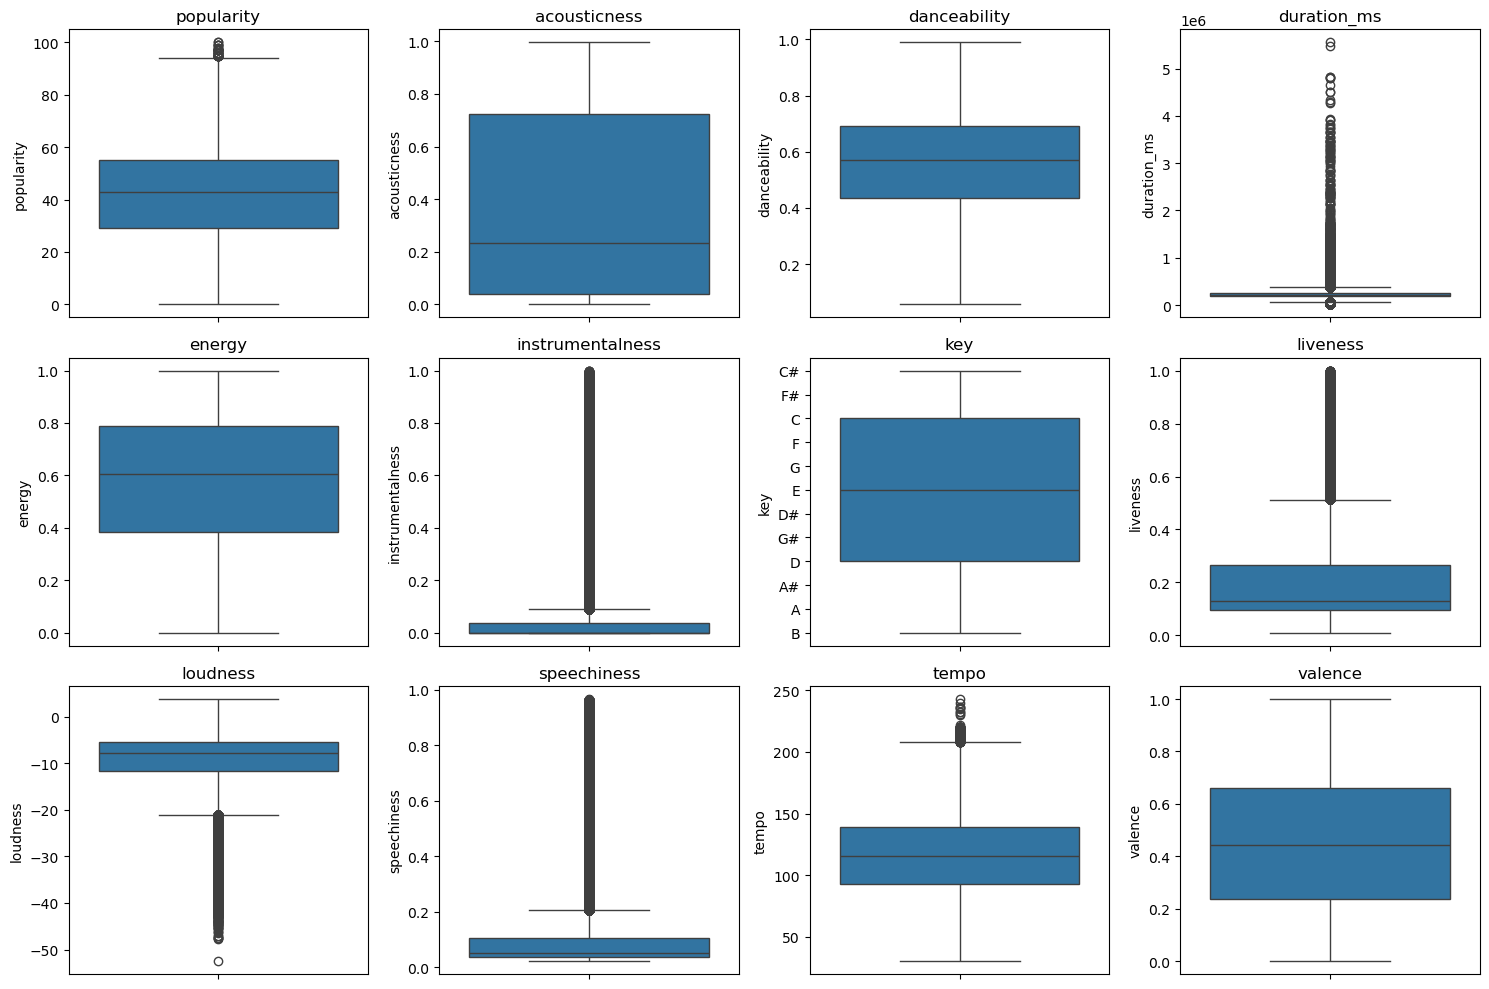

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ["popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", "loudness", "speechiness", "tempo", "valence"]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()
    

*Observations:* By examining the boxplots, you'll liekly see outliers in features like
duration_ms, loudness, tempo and possibly popularity.
The decision on how to handle these outliers depends on the scope of the project.
For this project we will proceed with teh data including the outliers for the prediction task.